In [3]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict


In [4]:
class BatsmanState(TypedDict):
    
    runs: int
    balls: int
    fours: int
    sixes: int
    
    sr: float
    bpb: float
    boundry_percent: float
    summary: str

In [5]:
def calculate_sr(state: BatsmanState):
    sr = (state['runs']/state['balls'])*100
    return {'sr': sr}

In [6]:
def calculate_bpb(state: BatsmanState):
    bpb = state['balls']/(state['fours'] + state['sixes'])
    return {'bpb': bpb}

In [7]:
def calculate_boundry_percent(state: BatsmanState):
    boundary_percent = (((state['fours'] * 4) + (state['sixes'] * 6)) / state['runs']) * 100
    return {'boundry_percent': boundary_percent}

In [8]:
def summary(state: BatsmanState):
    summary = f"""
Strike Rate - {state['sr']} \n
Balls per Boundary - {state['bpb']} \n
Boundary Percentage - {state['boundry_percent']} \n
"""
    return {'summary': summary}
    
    

In [9]:
# graph 
graph = StateGraph(BatsmanState)

graph.add_node('calculate_sr', calculate_sr)
graph.add_node('calculate_bpb', calculate_bpb)
graph.add_node('calculate_boundry_percent', calculate_boundry_percent)
graph.add_node('summary', summary)

# Edges

graph.add_edge(START, 'calculate_sr')
graph.add_edge(START, 'calculate_bpb')
graph.add_edge(START, 'calculate_boundry_percent')

graph.add_edge('calculate_sr', 'summary') 
graph.add_edge('calculate_bpb', 'summary')
graph.add_edge('calculate_boundry_percent', 'summary')

graph.add_edge('summary', END)

workflow = graph.compile()

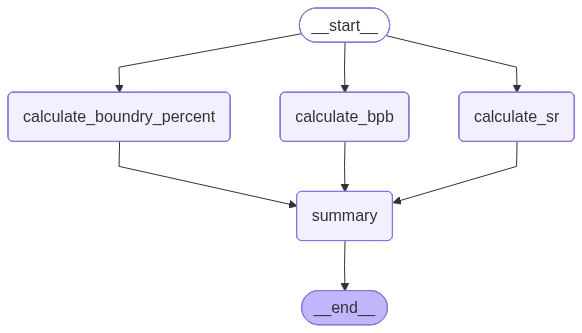

In [10]:
workflow

In [12]:
intial_state = {
    'runs': 100,
    'balls': 60,
    'fours': 8,
    'sixes': 4
}
workflow.invoke(intial_state)


{'runs': 100,
 'balls': 60,
 'fours': 8,
 'sixes': 4,
 'sr': 166.66666666666669,
 'bpb': 5.0,
 'boundry_percent': 56.00000000000001,
 'summary': '\nStrike Rate - 166.66666666666669 \n\nBalls per Boundary - 5.0 \n\nBoundary Percentage - 56.00000000000001 \n\n'}